<a href="https://colab.research.google.com/github/Victorbenavides/Regresion_Lineal_Datos_Medicos/blob/main/Regresion_Lineal_Datos_Medicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

In [ ]:
db=pd.read_csv('diabetes.csv')
db.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
X = db.iloc[:,1:8].values
y = db.iloc[:,8].values

In [ ]:

scaler = Normalizer().fit(X)
normalize_X = scaler.transform(X)
pca = PCA(n_components=1)
pca.fit(normalize_X)
print(pca.explained_variance_ratio_)
print(pca.components_)
reduction_X = pca.transform(normalize_X)

[0.7653652]
[[-3.42916962e-01 -2.05352815e-01  5.53423759e-02  9.00361280e-01
  -8.62233788e-02 -7.16538626e-04 -1.38166496e-01]]


# Para 2 componentes

In [ ]:
scaler = Normalizer().fit(X)
normalize_X = scaler.transform(X)
pca = PCA(n_components=2)
pca.fit(normalize_X)
print(pca.explained_variance_ratio_)
print(pca.components_)
reduction_X = pca.transform(normalize_X)

[0.7653652  0.13321054]
[[-3.42916962e-01 -2.05352815e-01  5.53423759e-02  9.00361280e-01
  -8.62233788e-02 -7.16538626e-04 -1.38166496e-01]
 [-4.87141914e-01  8.03223062e-01  2.88655995e-01  9.12413395e-03
   1.61603190e-01  1.22468192e-03  8.94586111e-02]]


# Para 3 componentes

In [ ]:
scaler = Normalizer().fit(X)
normalize_X = scaler.transform(X)
pca = PCA(n_components=3)
pca.fit(normalize_X)
print(pca.explained_variance_ratio_)
print(pca.components_)
reduction_X = pca.transform(normalize_X)

[0.7653652  0.13321054 0.0398823 ]
[[-3.42916962e-01 -2.05352815e-01  5.53423759e-02  9.00361280e-01
  -8.62233788e-02 -7.16538626e-04 -1.38166496e-01]
 [-4.87141914e-01  8.03223062e-01  2.88655995e-01  9.12413395e-03
   1.61603190e-01  1.22468192e-03  8.94586111e-02]
 [-3.88986534e-01  8.68209857e-02 -8.57556129e-01 -5.75750510e-02
  -2.05079298e-01 -2.51131933e-03  2.45703818e-01]]


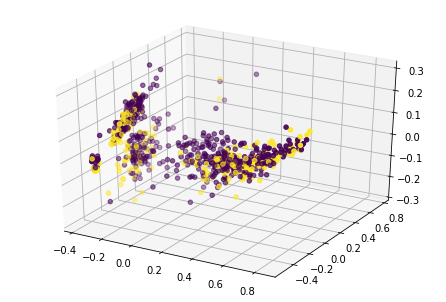

In [ ]:
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(reduction_X[:,0], reduction_X[:,1], reduction_X[:,2], c=y)
plt.show()

#      Problema 2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df=pd.read_csv('diabetes.csv')
X = df.iloc[:,2:3].values
y = df.iloc[:,8].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)
linear_regressor = LinearRegression(normalize = True)
linear_regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

In [ ]:
predictions = linear_regressor.predict(X_test)

In [ ]:
print("Root mean squared error (RMSE): %.2f" % sqrt(mean_squared_error(y_test, predictions)))
print("%%error:%f" % (sqrt(mean_squared_error(y_test, predictions))/mean(y_test)))

Root mean squared error (RMSE): 0.48
%error:1.364581
